In [1]:
# Import package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import igraph
import scvelo as scv
import loompy as lmp
import anndata

/home/jaehyunchoi/.conda/envs/test02/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/jaehyunchoi/.conda/envs/test02/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/home/jaehyunchoi/.conda/envs/test02/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/home/jaehyunchoi/.conda/envs/test02/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/jaehyunchoi/.conda/envs/test02/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarn

In [15]:
adata= scv.read("/home/jaehyunchoi/bystander_collaboration/Figure_script_IPF/Data/Byst_cellannot.h5ad")
adata

AnnData object with n_obs × n_vars = 24129 × 32285
    obs: 'n_counts', 'n_genes', 'mt_counts', 'mt_frac', 'batch', 'sample_batch', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'celltype_detail', 'celltype'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'celltype_colors', 'celltype_detail_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'tsne', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

# cluster portion of CD4 T cells data

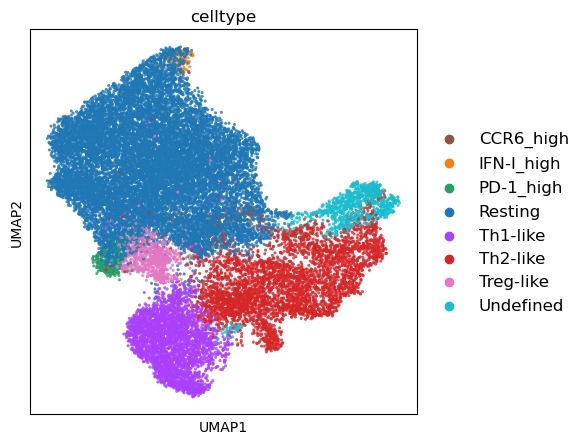

In [18]:
# Figure 생성
fig, ax = plt.subplots(figsize=(5, 5))

# Scanpy UMAP 플롯 (기존 색상 유지)
sc.pl.umap(
    adata, 
    color='celltype',
    size=20,
    alpha=0.8,
    legend_fontsize=12,
    #palette=loaded_color_dict,  # ✅ 기존 색상 적용
    ax=ax  
)

plt.show()

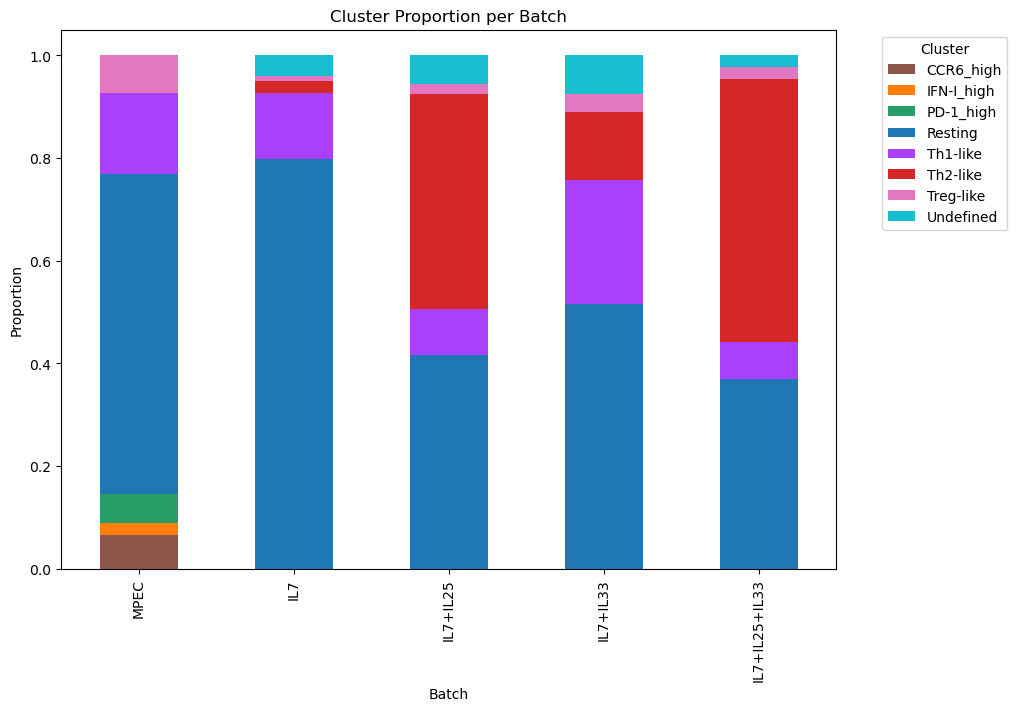

In [20]:
# Make Stacked bargraph for the comparison of cluster compositions
cluster_labels = adata.obs['celltype']
batch_labels = adata.obs['batch']
crosstab = pd.crosstab(batch_labels, cluster_labels, normalize='index')

import seaborn as sns
import matplotlib.pyplot as plt
# 원하는 batch 순서
batch_order = ['MPEC', 'IL7', 'IL7+IL25','IL7+IL33','IL7+IL25+IL33']

# crosstab 행 순서 재정렬
crosstab = crosstab.reindex(batch_order)

# 그래프 그리기
crosstab.plot(kind='bar', stacked=True, figsize=(10, 7), color=adata.uns['celltype_colors'])  # color=... 도 추가 가능

# 그래프 설정
plt.title('Cluster Proportion per Batch')
plt.ylabel('Proportion')
plt.xlabel('Batch')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [21]:
adata_diff = adata[adata.obs['batch'] != 'MPEC'].copy()
adata_diff

AnnData object with n_obs × n_vars = 18890 × 32285
    obs: 'n_counts', 'n_genes', 'mt_counts', 'mt_frac', 'batch', 'sample_batch', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'celltype_detail', 'celltype'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'celltype_colors', 'celltype_detail_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'tsne', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

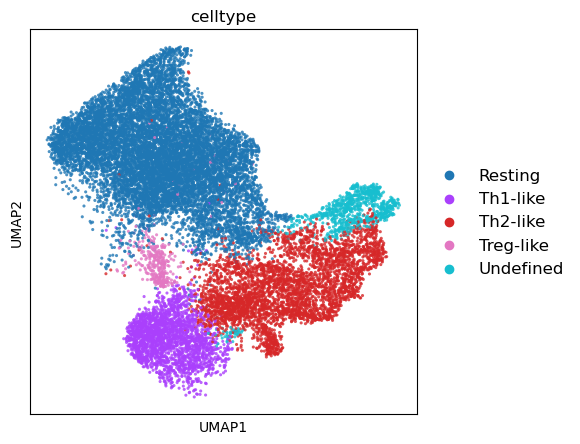

In [22]:
# Figure 생성
fig, ax = plt.subplots(figsize=(5, 5))

# Scanpy UMAP 플롯 (기존 색상 유지)
sc.pl.umap(
    adata_diff, 
    color='celltype',
    size=20,
    alpha=0.8,
    legend_fontsize=12,
    #palette=loaded_color_dict,  # ✅ 기존 색상 적용
    ax=ax  
)

plt.show()

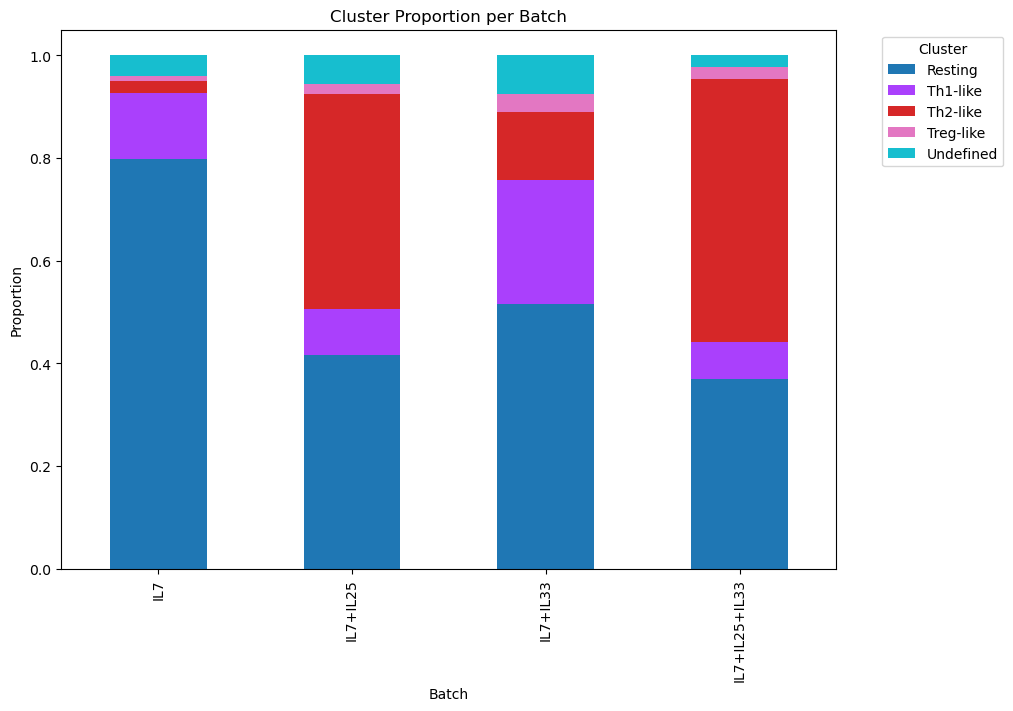

In [23]:
# Make Stacked bargraph for the comparison of cluster compositions
cluster_labels = adata_diff.obs['celltype']
batch_labels = adata_diff.obs['batch']
crosstab = pd.crosstab(batch_labels, cluster_labels, normalize='index')
# 원하는 batch 순서
batch_order = [ 'IL7', 'IL7+IL25','IL7+IL33','IL7+IL25+IL33']

# crosstab 행 순서 재정렬
crosstab = crosstab.reindex(batch_order)
import seaborn as sns
import matplotlib.pyplot as plt
crosstab.plot(kind='bar', stacked=True, figsize=(10, 7), color=adata_diff.uns['celltype_colors'])

# 그래프 설정
plt.title('Cluster Proportion per Batch')
plt.ylabel('Proportion')
plt.xlabel('Batch')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [29]:
marker_genes = ["Cdkn3", "Cdk1", "Mki67", "Ctla4", "Foxp3", "Gata3", "Il5", "Il1rl1", "Il13", "Tbx21","Id2","Cxcr3","Btg2","Slamf6",
                "Klf2","Bcl2","Nr4a1","Bcl6","Cxcr5","Pdcd1","Ifit1","Ifit3","Rorc","Ccr6"]

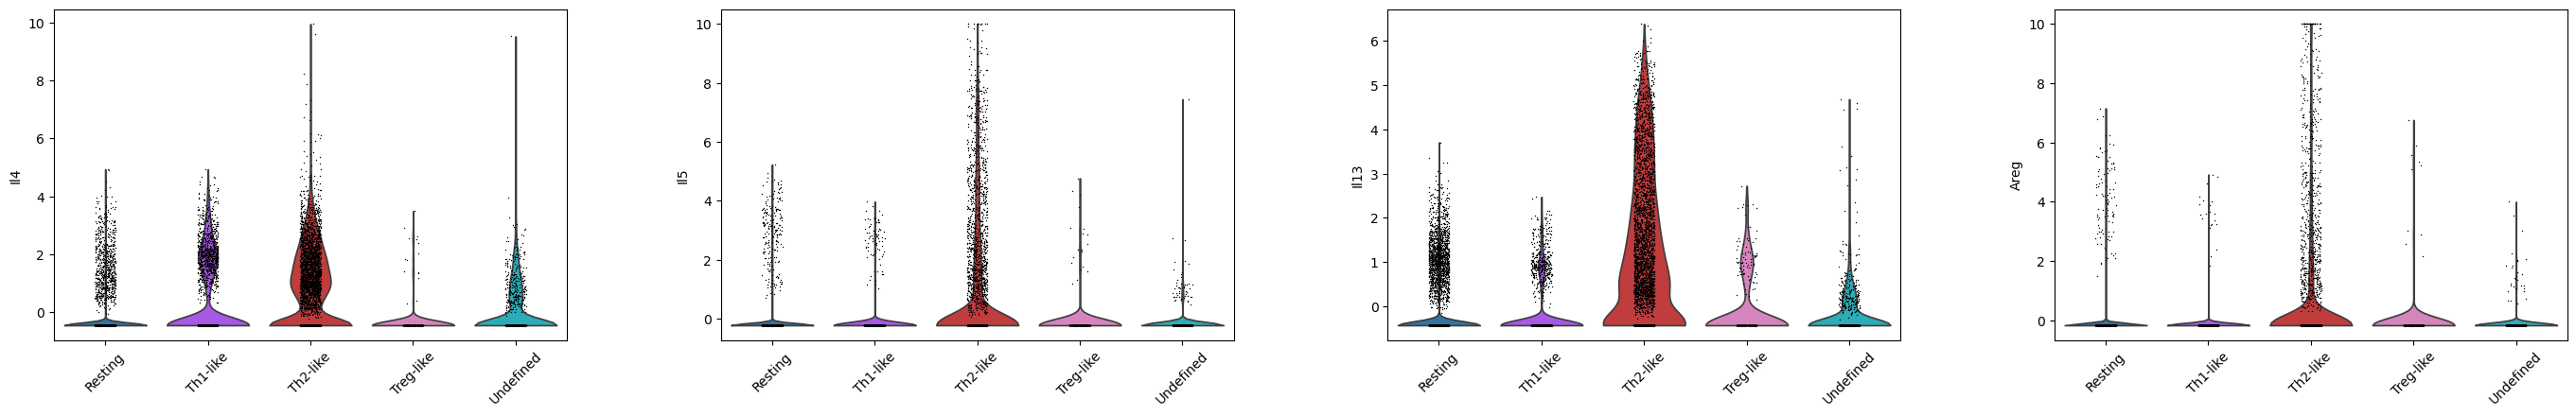

In [34]:
sc.pl.violin(adata_diff,["Il4","Il5","Il13","Areg"],groupby = "celltype", rotation= 45)

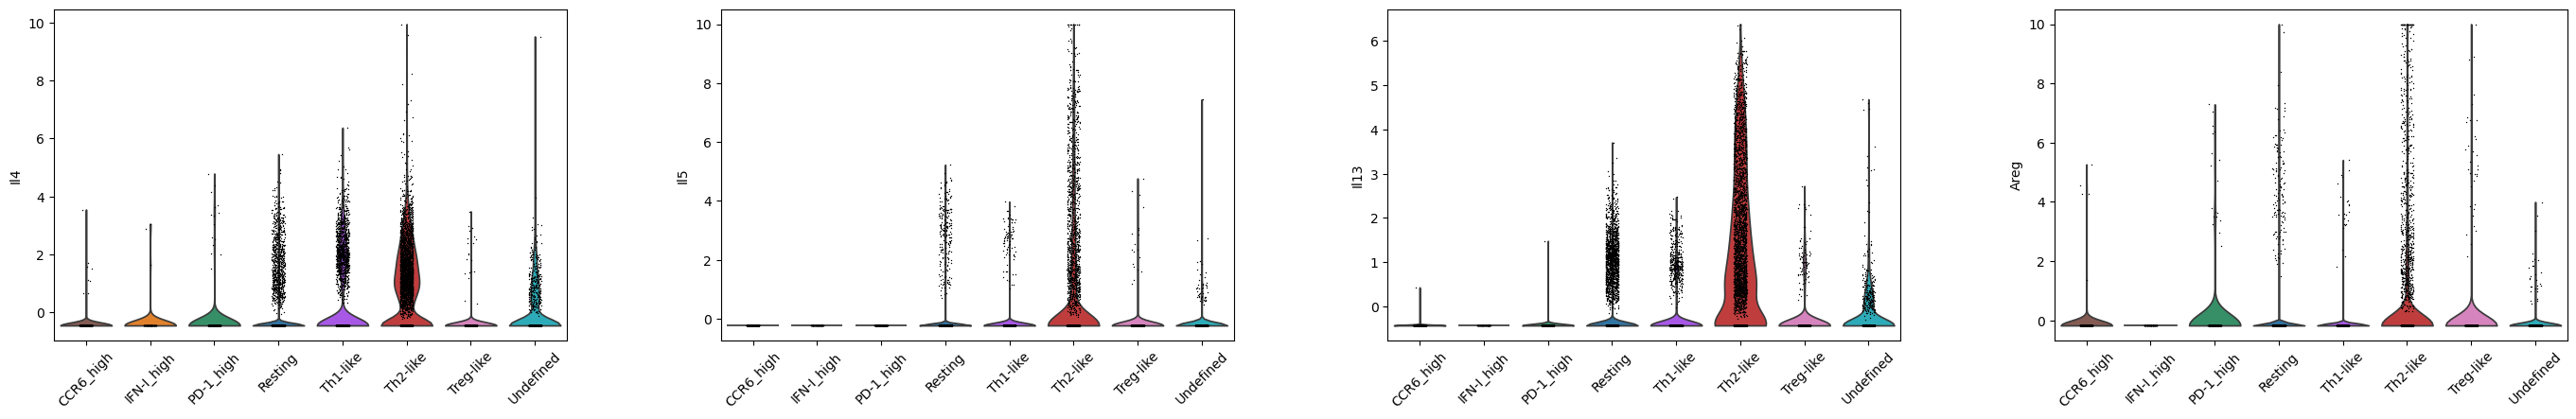

In [32]:
sc.pl.violin(adata,["Il4","Il5","Il13","Areg"],groupby = "celltype", rotation= 45)

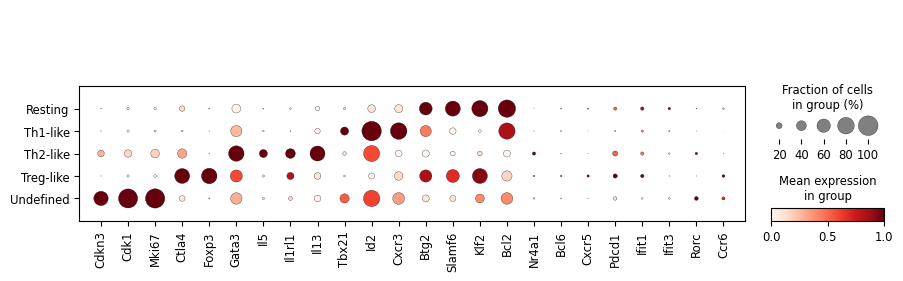

In [33]:
sc.pl.dotplot(adata_diff, marker_genes, groupby="celltype", standard_scale="var")

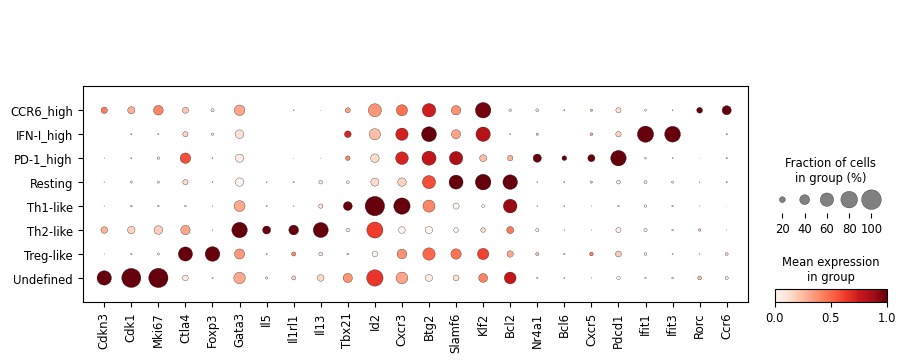

In [30]:
sc.pl.dotplot(adata, marker_genes, groupby="celltype", standard_scale="var")

# cytokine differentiation cells DEG analysis

In [31]:
adata_diff

AnnData object with n_obs × n_vars = 18890 × 32285
    obs: 'n_counts', 'n_genes', 'mt_counts', 'mt_frac', 'batch', 'sample_batch', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'celltype_detail', 'celltype'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'celltype_colors', 'celltype_detail_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'tsne', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

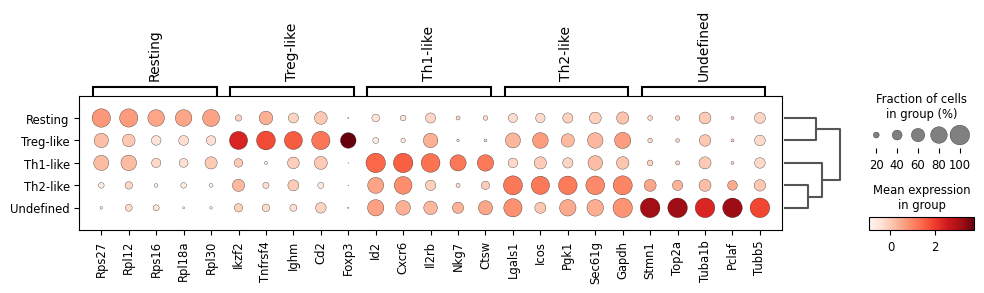

In [35]:
sc.tl.rank_genes_groups(adata_diff, groupby='celltype', method='wilcoxon')
sc.pl.rank_genes_groups_dotplot(adata_diff, n_genes=5)

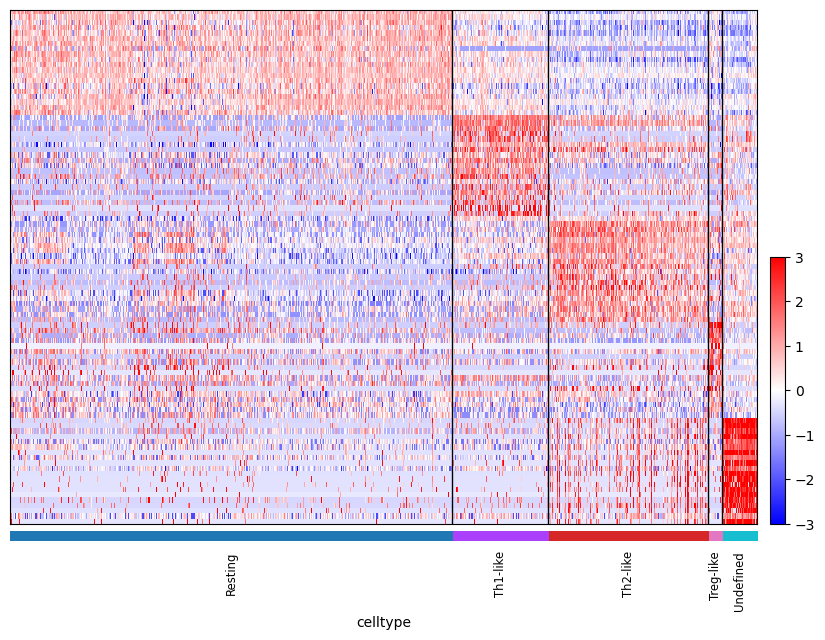

In [38]:
rank_df = sc.get.rank_genes_groups_df(adata_diff, group=None)
top_genes = rank_df.groupby("group")["names"].apply(lambda x: x.head(20)).explode().unique().tolist()
sc.pl.heatmap(
    adata_diff,
    var_names=top_genes,
    groupby="celltype",
    use_raw=False,
    cmap="bwr",
    vmin=-3,
    vmax=3,
    swap_axes=True,
    dendrogram=False,
    show=True,
    figsize=(10, 7)
)

In [39]:
# 그룹별 샘플링 수
n_cells_per_group = 80
groups = adata_diff.obs['celltype'].unique()

# 샘플링된 셀들의 인덱스 저장
selected_indices = []

for group in groups:
    group_cells = adata_diff.obs[adata_diff.obs['celltype'] == group].index
    n = min(len(group_cells), n_cells_per_group)  # 그룹 크기가 작을 경우 자동 조절
    sampled = np.random.choice(group_cells, n, replace=False)
    selected_indices.extend(sampled)

adata_sampled = adata_diff[selected_indices]

{'heatmap_ax': <Axes: >,
 'groupby_ax': <Axes: xlabel='celltype'>,
 'gene_groups_ax': <Axes: >}

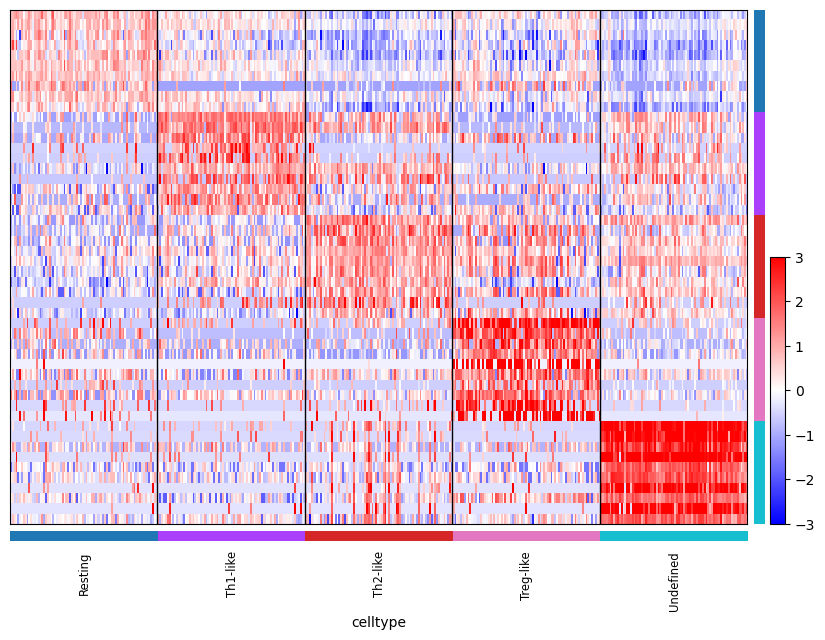

In [40]:
sc.pl.rank_genes_groups_heatmap(
    adata_sampled,
    n_genes=10,
    groupby="celltype",
    use_raw=False,
    swap_axes=True,
    vmin=-3,
    vmax=3,
    dendrogram=False,
    figsize=(10, 7),
    cmap="bwr",
    show=False,
    show_gene_labels=False
)

# CD4 T cells include DEG analysis

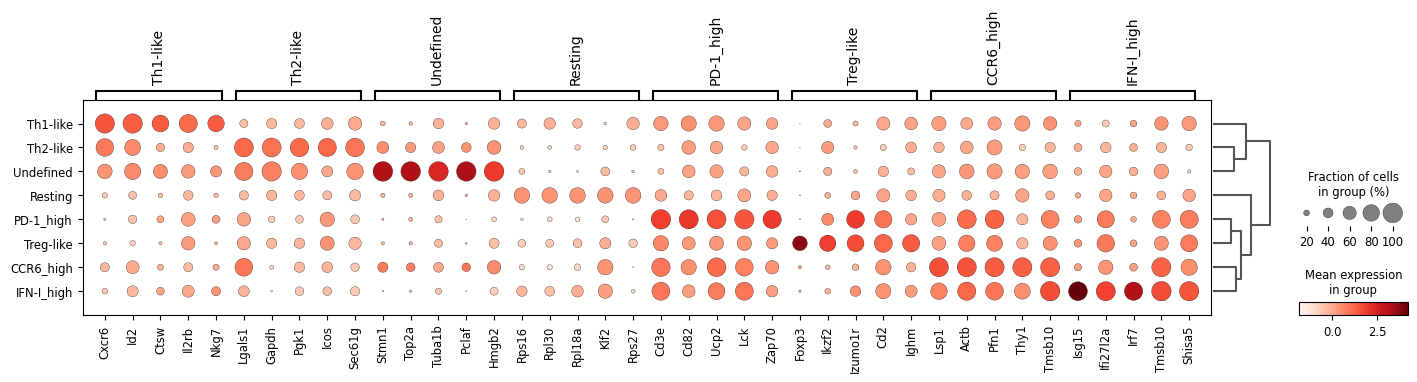

In [41]:
sc.tl.rank_genes_groups(adata, groupby='celltype', method='wilcoxon')
sc.pl.rank_genes_groups_dotplot(adata, n_genes=5)

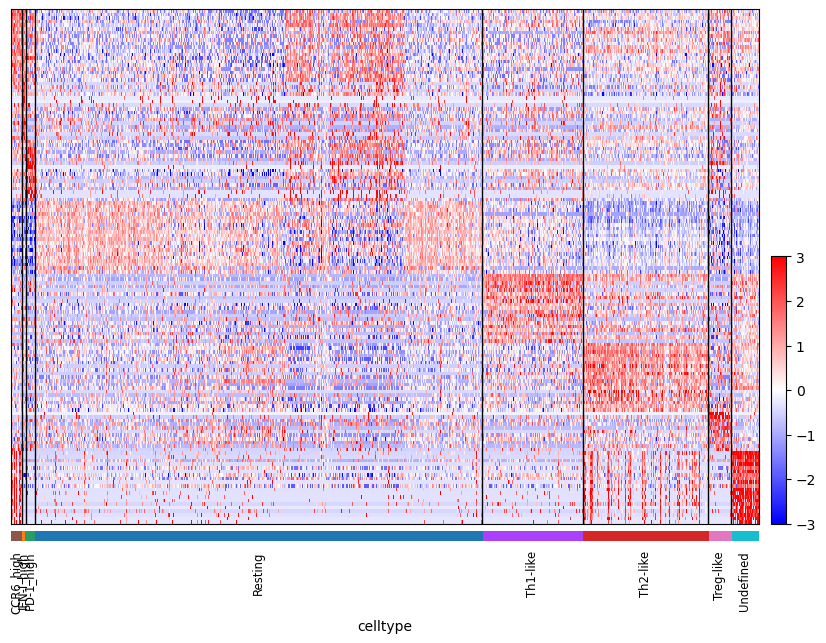

In [42]:
rank_df = sc.get.rank_genes_groups_df(adata, group=None)
top_genes = rank_df.groupby("group")["names"].apply(lambda x: x.head(20)).explode().unique().tolist()
sc.pl.heatmap(
    adata,
    var_names=top_genes,
    groupby="celltype",
    use_raw=False,
    cmap="bwr",
    vmin=-3,
    vmax=3,
    swap_axes=True,
    dendrogram=False,
    show=True,
    figsize=(10, 7)
)

In [43]:
# 그룹별 샘플링 수
n_cells_per_group = 80
groups = adata.obs['celltype'].unique()

# 샘플링된 셀들의 인덱스 저장
selected_indices = []

for group in groups:
    group_cells = adata.obs[adata.obs['celltype'] == group].index
    n = min(len(group_cells), n_cells_per_group)  # 그룹 크기가 작을 경우 자동 조절
    sampled = np.random.choice(group_cells, n, replace=False)
    selected_indices.extend(sampled)

adata_sampled = adata[selected_indices]

{'heatmap_ax': <Axes: >,
 'groupby_ax': <Axes: xlabel='celltype'>,
 'gene_groups_ax': <Axes: >}

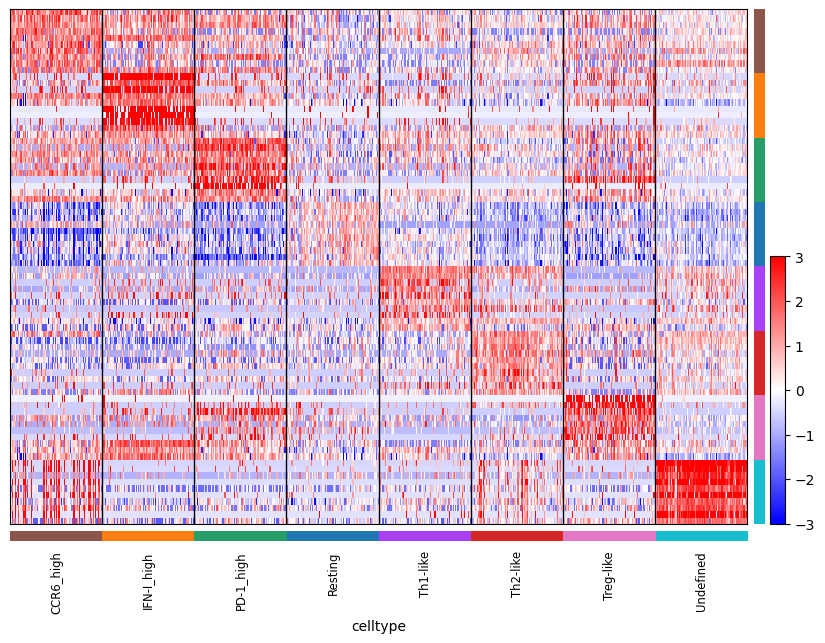

In [44]:
sc.pl.rank_genes_groups_heatmap(
    adata_sampled,
    n_genes=10,
    groupby="celltype",
    use_raw=False,
    swap_axes=True,
    vmin=-3,
    vmax=3,
    dendrogram=False,
    figsize=(10, 7),
    cmap="bwr",
    show=False,
    show_gene_labels=False
)

In [45]:
# after cluster annotation barcode-cluster csv to R, DEG analyze in R 

In [47]:
print(adata.obs['celltype'].value_counts())

celltype
Resting       14447
Th2-like       4051
Th1-like       3244
Undefined       885
Treg-like       739
CCR6_high       341
PD-1_high       299
IFN-I_high      123
Name: count, dtype: int64


In [48]:
print(adata_diff.obs['celltype'].value_counts())

celltype
Resting      11183
Th2-like      4051
Th1-like      2421
Undefined      885
Treg-like      350
Name: count, dtype: int64
